# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Condensed

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

### Data import and initial cleansing/transforming

In [88]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

# Import IPython's display module
from IPython.display import display

In [89]:
# There are 3 different types of values for the London boroughs.
# # 35 Title-cased values
# # 3 Unnamed values
# # 9 ALL CAPS values
# My first thought was to dive in and figure out why there are "Unnamed" values and summary values and then what those
# extra 3 title-cased values are, but I think the more reliable solution is to get the list of boroughs and filter the dataset on that.
# I sourced this list of boroughs from https://en.wikipedia.org/wiki/London_boroughs
# The trick is to clean up the list to match the exact formatting and values of the dataset.
borough_list = ['Camden', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Islington', 'Kensington & Chelsea',
                'Lambeth', 'Lewisham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster', 'Barking & Dagenham',
                'Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Haringey', 'Harrow',
                'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Merton', 'Newham', 'Redbridge',
                'Richmond upon Thames', 'Sutton', 'Waltham Forest']

# Quick function definition to display summary outputs all at once
def quick_df_info(df, values=['head', 'tail', 'shape', 'columns', 'describe', 'info'], head_n=5):
    try:
        display('Summary for DataFrame')
    except ModuleNotFoundError:
        print("Error: Forgot to import module.")
        print("Add 'from IPython.display import display' to imports")
    if 'head' in values:
        display(df.head(head_n))
    if 'tail' in values:
        display(df.tail(head_n))
    if 'shape' in values:
        display(df.shape)
    if 'columns' in values:
        display(df.columns)
    if 'describe' in values:
        display(df.describe())
    if 'info' in values:
        display(df.info())

# Loading data from data.london.gov.uk
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
quick_df_info(properties)

'Summary for DataFrame'

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
314,2021-02-01,730222.3496,315391.0211,538537.8796,359368.9877,514749.4597,455226.8295,792051.1332,385768.6115,502614.7722,...,185770.0926,182533.3897,214631.6781,217464.2506,310556.6572,493889.7793,342157.7228,280317.0527,NaN,269191.4694
315,2021-03-01,726743.0772,314172.1341,542794.6969,362227.5335,520522.7668,458091.5098,809571.3537,391708.0164,505259.5954,...,188153.7564,185164.7888,215786.5076,219633.8093,313654.2679,503289.9615,348018.2642,285458.6825,NaN,272987.6233
316,2021-04-01,739454.4285,313280.4834,538530.3551,364947.2557,503031.9842,464266.8416,840331.2163,391736.3965,506920.9648,...,185930.9243,179806.3858,213958.1498,218360.9004,313015.298,502651.7492,346329.7765,279670.6042,NaN,270118.9581
317,2021-05-01,767715.6627,310713.7151,540475.0074,364266.9832,501559.7541,474720.4508,860976.7539,392800.552,504435.823,...,187533.1817,181563.5443,215919.8743,219015.2513,312866.3164,497695.5885,346604.6048,279642.4876,NaN,270788.0905
318,2021-06-01,756163.9647,319220.4702,548442.3483,364502.0488,512645.4978,486648.1468,878870.1571,389642.1013,508177.2699,...,200221.9349,194518.0643,226846.1931,231428.6977,327016.5045,510298.6011,355948.2873,294905.8915,NaN,284029.2967


(319, 49)

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            318 non-null    datetime64[ns]
 1   City of London        319 non-null    object        
 2   Barking & Dagenham    319 non-null    object        
 3   Barnet                319 non-null    object        
 4   Bexley                319 non-null    object        
 5   Brent                 319 non-null    object        
 6   Bromley               319 non-null    object        
 7   Camden                319 non-null    object        
 8   Croydon               319 non-null    object        
 9   Ealing                319 non-null    object        
 10  Enfield               319 non-null    object        
 11  Greenwich             319 non-null    object        
 12  Hackney               319 non-null    object        
 13  Hammersmith & Fulham

None

### Summary of initial data inspection
The imported Excel file has each record as a row rather than column requiring the dataframe to be transposed. But that leads to a very wide file with the columns made up of the borough, an ID, and then a series of dates.

It looks like we also have null values for some of the boroughs and will need to be cleaned. We'll chain the initial cleaning below to get a better dataframe to work with.

In [90]:
p_df = (properties
    .transpose() # Transpose dataframe to get the boroughs in a column
    .reset_index() # Pull the boroughs from the index but don't drop the values
    .rename(columns=properties.iloc[:,0]) # The transposition makes it tricky, but pull the first column of the original dataset and apply it as the headers of the post-transposed dataframe
    .rename(columns=str) 
    .rename(columns={'index': 'borough', 'NaT': 'b_id'}) # These two allow renaming of empty column header value
    .drop(0) # Drops the now-unneccessary first row of the dataframe since it has been promoted to headers
    .melt(id_vars=['borough', 'b_id'], var_name='date', value_name='price') # Melt the dataframe to go from wide to long format allowing for one row per observation
    .assign(date=lambda x: pd.to_datetime(x['date']),
            price=lambda x: x['price'].astype(float)) # Change the data types for 'date' and 'price'
    .query('borough in @borough_list') # Get rid of the non-borough values in the borough column
    .query('date >= "1998-01-01" and date <= "2018-12-31"') # Limit the dates to the period of analysis that we'll be focusing on
)

quick_df_info(p_df)


'Summary for DataFrame'

,borough,b_id,date,price
1729,Barking & Dagenham,E09000002,1998-01-01,57558.99414
1730,Barnet,E09000003,1998-01-01,115902.41030
1731,Bexley,E09000004,1998-01-01,76863.45528
1732,Brent,E09000005,1998-01-01,93745.96395
1733,Bromley,E09000006,1998-01-01,102341.81560


,borough,b_id,date,price
13804,Sutton,E09000029,2018-12-01,375473.92183
13805,Tower Hamlets,E09000030,2018-12-01,438896.35230
13806,Waltham Forest,E09000031,2018-12-01,439078.67321
13807,Wandsworth,E09000032,2018-12-01,595503.76753
13808,Westminster,E09000033,2018-12-01,965022.63959


(8064, 4)

Index(['borough', 'b_id', 'date', 'price'], dtype='object')

,price
count,8.064000e+03
mean,3.104309e+05
std,1.875909e+05
min,5.736030e+04
25%,1.974357e+05
50%,2.630545e+05
75%,3.792196e+05
max,1.463378e+06


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8064 entries, 1729 to 13808
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   borough  8064 non-null   object        
 1   b_id     8064 non-null   object        
 2   date     8064 non-null   datetime64[ns]
 3   price    8064 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 315.0+ KB


None

### Visualizing the data
1. Subset a particular London borough
2. Show that borough at the yearly level to reduce data points
3. Show all boroughs at the yearly level to see the overall trend

Then will move to creating the long-term avg metric we'll do analysis on

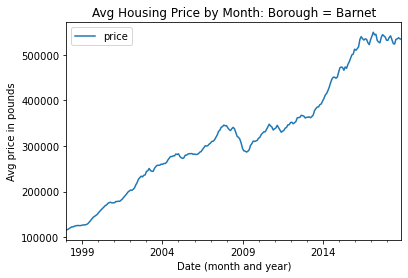

In [91]:
plot_borough = 'Barnet'
(p_df
    .loc[p_df['borough'] == plot_borough, :]
    .plot(x='date', y='price')
)
plt.title(f"Avg Housing Price by Month: Borough = {plot_borough}")
plt.xlabel("Date (month and year)")
plt.ylabel("Avg price in pounds")
plt.show()

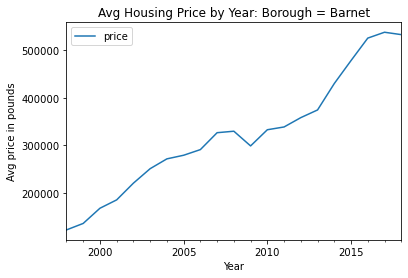

In [92]:
# Create a separate df by year since we'll be coming back to it
year_df = (p_df
    .set_index(['borough', 'date']) # Get borough and date to the index so I don't lose them (But b_id can be dropped)
    .groupby([pd.Grouper(level='borough'), pd.Grouper(level='date', freq='Y')]) # resample at the yearly level
    .mean() # Take the average of the averages throughout the year? This seems a bit suspect, but it is consistent throughout the dataset so comparisons should still be good
    .reset_index() # Get the borough and date back out of the index for ease of plotting
)

year_df[year_df['borough'] == plot_borough].plot(x='date', y='price')
plt.title(f"Avg Housing Price by Year: Borough = {plot_borough}")
plt.xlabel("Year")
plt.ylabel("Avg price in pounds")
plt.show()

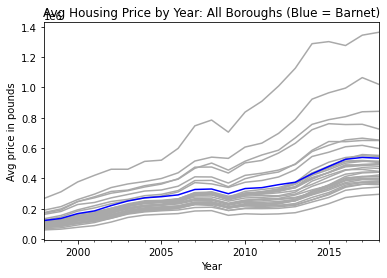

In [93]:
# Show all the boroughs but highlight plot_borough since that's our example
borough_cmap = {x: 'blue' if x == plot_borough else 'darkgray' for x in list(year_df['borough'].unique())}

def highlight_borough(df, borough=None):
    if borough:
        temp_s = df[borough]
        df.pop(borough)
        df[borough] = temp_s
        return df
    return df

(year_df
    .pivot_table(values='price', index='date', columns='borough')
    .pipe(highlight_borough, plot_borough)
    .plot(color=borough_cmap, legend=False)
)
plt.title(f"Avg Housing Price by Year: All Boroughs (Blue = {plot_borough})")
plt.xlabel("Year")
plt.ylabel("Avg price in pounds")
plt.show()

### Determine ratio of values in 1998 vs 2018
Add a column to year_df that can be used to determine which boroughs have seen the greatest increase in housing prices. There are a number of ways to represent this value, but I will be using a ratio to show how many times over the value has increased between 1998 and 2018.

In [99]:
def create_price_ratio(grp, start_year=1998, end_year=2018):
    start_val = grp.loc[grp['year'] == start_year, 'price'].max()
    end_val = grp.loc[grp['year'] == end_year, 'price'].max()
    return pd.Series({f'val_{start_year}': start_val, f'val_{end_year}': end_val, 'ratio': end_val / start_val})

ratio_df = (year_df
    .assign(year=lambda x: x['date'].dt.year)
    .groupby('borough')
    .apply(create_price_ratio)
    .sort_values(by='ratio', ascending=False)
)
ratio_df.head(10)

,val_1998,val_2018,ratio
borough,,,
Hackney,87869.535804,5.446405e+05,6.198286
Waltham Forest,75557.474132,4.408594e+05,5.834756
Southwark,91405.187779,5.042354e+05,5.516485
Lewisham,75539.051649,4.116290e+05,5.449221
Westminster,190531.949942,1.020025e+06,5.353565
Newham,67671.270763,3.590225e+05,5.305390
Haringey,107419.850108,5.515606e+05,5.134625
Kensington & Chelsea,268350.122142,1.363880e+06,5.082465
Lambeth,103179.118943,5.115364e+05,4.957751


### Highlight Hackney Borough (Ratio = 6.20 comparing 2018 to 1998)
To see how this borough compares to the others, I am re-running the plots but with Hackney highlighted rather than Barnet

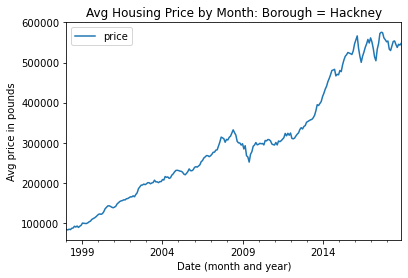

In [95]:
plot_borough = 'Hackney'
(p_df
    .loc[p_df['borough'] == plot_borough, :]
    .plot(x='date', y='price')
)
plt.title(f"Avg Housing Price by Month: Borough = {plot_borough}")
plt.xlabel("Date (month and year)")
plt.ylabel("Avg price in pounds")
plt.show()

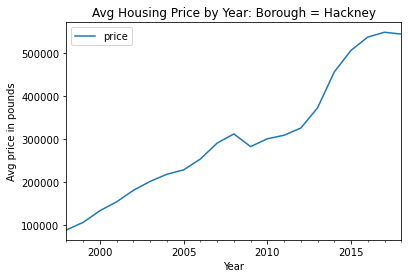

In [96]:
year_df[year_df['borough'] == plot_borough].plot(x='date', y='price')
plt.title(f"Avg Housing Price by Year: Borough = {plot_borough}")
plt.xlabel("Year")
plt.ylabel("Avg price in pounds")
plt.show()

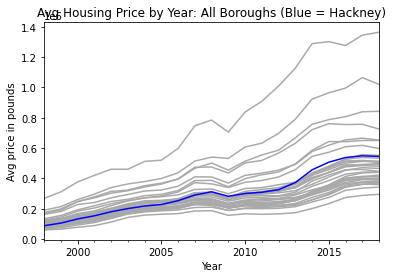

In [98]:
borough_cmap = {x: 'blue' if x == plot_borough else 'darkgray' for x in list(year_df['borough'].unique())}
(year_df
    .pivot_table(values='price', index='date', columns='borough')
    .pipe(highlight_borough, plot_borough)
    .plot(color=borough_cmap, legend=False)
)
plt.title(f"Avg Housing Price by Year: All Boroughs (Blue = {plot_borough})")
plt.xlabel("Year")
plt.ylabel("Avg price in Millions of Pounds")
plt.show()

In [121]:
# As an additional view, highlight the top 10 boroughs in avg price in 2018 and see where Hackney falls
def row_highlight(row, val=None):
    if row.name == 'Hackney':
        return ['background-color: steelblue'] * len(row.values)
    return [''] * len(row.values)

(ratio_df
    .sort_values(by='val_2018', ascending=False)
    .nlargest(10, columns='val_2018')
).style.apply(row_highlight, axis=1)

,val_1998,val_2018,ratio
borough,,,
Kensington & Chelsea,268350.122142,1363880.121267,5.082465
Westminster,190531.949942,1020025.253393,5.353565
Camden,170688.973933,842410.409361,4.935353
Hammersmith & Fulham,175340.921250,725525.331140,4.137798
Richmond upon Thames,162956.066025,652665.426320,4.005162
Islington,134148.973300,649824.067533,4.844048
Wandsworth,125406.807233,596649.139044,4.757709
Haringey,107419.850108,551560.644010,5.134625
Hackney,87869.535804,544640.475027,6.198286


## Conclusion
While there was a clear increasing trend across all 32 boroughs, average home prices increased most dramatically in the Hackney borough. The average price was ranked near the bottom in 1998 but surged to 9th of the 32 boroughs in just 20 years. While the average home price of 545k is dwarfed by the heavy hitters like Kensington & Chelsea (avg 1.36M) or Westminster (avg 1.02M), these boroughs had comparatively high average 1998 home prices to Hackney.